

**XGBOOST** is one of leading ML model to work with tabular data.It was developed by Tianqi Chen and Carlos Guestrin and it is an ensemble machine learning technique that uses the Gradient boosting . But many of them use it as blackbox. This kernel aims to give you full understanding of XGBOOST classifier. Let us see how we can build it by hand using mathematical calculations as well as  using xgboost library and let us compare the results. Before getting in to xgboost you have to know how boosting works.


### How Boosting works?

Boosting is an ensemble-based learning algorithm that converts weak learn learners to strong estimators which involves training ML models sequentially one after the other wherein in each iteration model tries to correct the error made by the model in the previous iteration.Gradient Boosting is a boosting technique wherein in each iteration the new predictor is built to fit on the pseudo-residuals of the previous predictor

1. Mean target value is calcuated and it becomes our base prediction. 

2. Calculate the resiudals based on the initial prediction.

3. Construct a decision tree with residuals as target variable and new predictions are calculated addictivly using earlier prediction and some learning rate.

4. Repeat step 2 and step 3 M number of times until the required number of models are built.

5. The final prediction from boosting is the additive sum of all previous predictions made by the models.


<img src="https://miro.medium.com/max/461/1*A9myadIB_CqJv-EJA-G_bA.png">

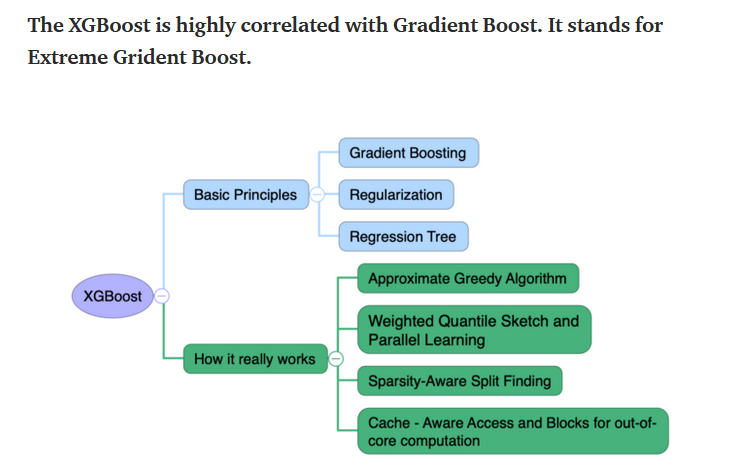

In [ ]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier,plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

## XGBOOST Classfier

The following is our small dataframe we are going to work for classification.Let us see how we can construct a xgboost classfier.

In [ ]:
df = {'Dosage':[2,8,12,18],'Gender': ['M','F','M','F'],'Effect':[0,1,1,0]}
df = pd.DataFrame(df)
df

Before starting model creation, let us define our parameters:
    
* max_depth(maximum depth of decision tree) : 2
* learning_rate : 1
* gamma : 2
* min_child_weight(factor which controls tree pruning): 0
* reg_lambda:  0
* base_score : 0.5
* n_estimators : 2

Don't worry too much by just seeing the parameters. As we continues, you we get each one of them.


# Calculation using simple mathematics

## Step1: Create a base model / Initial prediction (F0(x))

This is based on **<font color='blue'>base_score</font>** that we set.  For binary classification problems we usually set it 0.5.

So, F0(x) = h0(x) = 0.5.


## Step2: Calculate the residuals

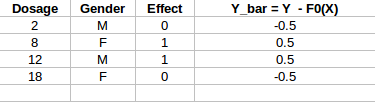

## Step3 : Create a model based on residuals.

This step contains multiple steps:

### (3.1) First construct all posible trees and calculate similarity and gain for each tree.

Note that We have the following equations for gain and similarity score


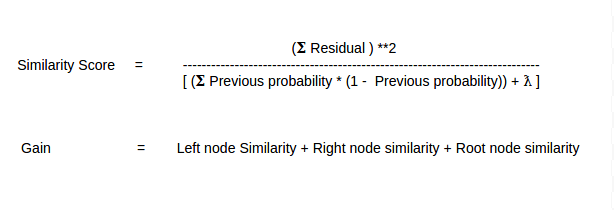


Let us create the first decision tree


Note: An important thing to note is that in this step initially we will construct all posible stump trees forst. (tree with depth 1). The lambda in above equation is nothing but <font color="blue">reg_lambda</font>. Here reg_lambda = 0.

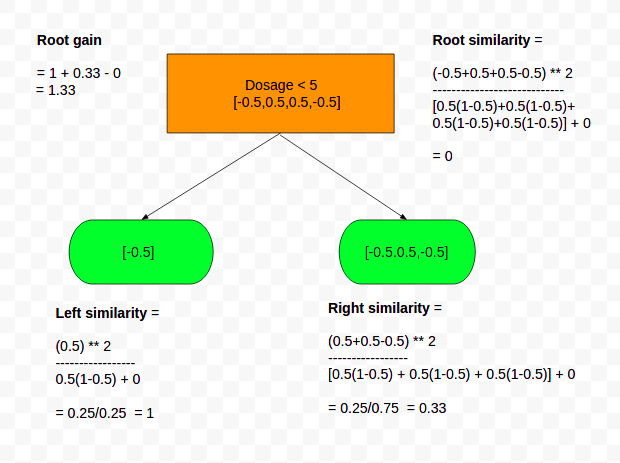



We will also calculate similarity score and gain as per above equations. Similarly calculate all possible trees.

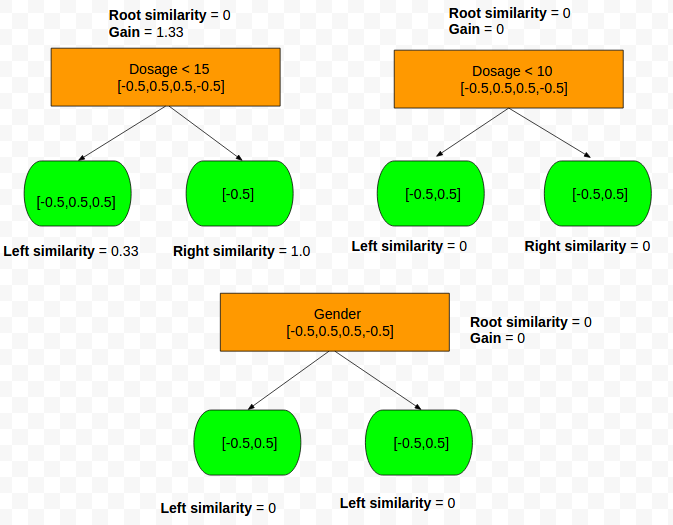

We can see that tree with dosage < 15 and dosage < 5 gives high gain value. Choose any one of them. We choose tree with dosage < 15.

### (3.2) Since we have choosen max_depth = 2, Allow tree to grow to depth of 2 in similar fashion.
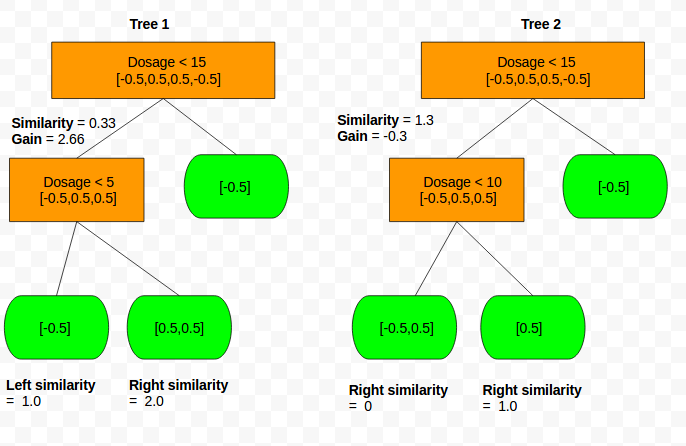

From the above based on gain we choose Dosage < 5 as our second node (tree1) and constructed a fully grown tree (as per our <font color='blue'>max_depth</font>. Here we gave max_depth=2, so we created a tree of depth 2).


### (3.3) Post Pruning of tree.

Next step is pruning the tree. Here we remove portion of tree which is not usefull.

**How to perform prunning?**

We already defined a parameter <font color='blue'>gamma = 2</font>. This determines how to prune the trees. Starting from the last node


  If (gain - gamma) < 0:

           Remove that particular node and check the same for the node just above it and continue pruning.

   Else:

           Donot remove that node and stop pruning.
           
Here we have gain = 2.66

So,  gain - gamma = 2.66 - 2 = 0.66 > 0,  So we dont prune and leave as it is.

### (3.4) Calculate output value.

We have the following equation to calculate the output.  Here lambda is the parameter we initialized earilier(lambda = 0)

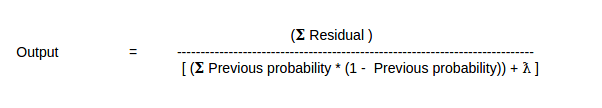

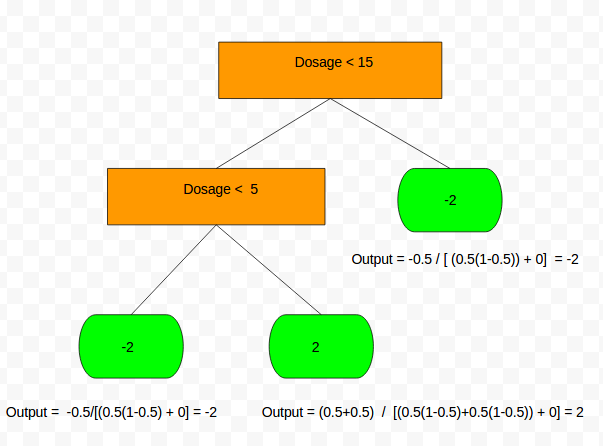

### (3.5) Calculate the probability of each prediction

*  For that first we need to convert our previous probability to a number.
Note: We have F0(x) as probability. To convert it to number use log(odds)

**log(odds) = log(p/1-p) = log(0.5/(1-0.5)) = log(1) = 0**

* Now calculate new probability.

**F1(X) = sigmoid ( h0(x) + learning_rate * h1(x) )** 



Here Leaning rate = 1
New prediction(h1(x) = Sigmoid(Previous Prediction + Learning rate * Output)
      First value  2 is < 5  So   = Sigmoid (0+1* (-2) - From Tree)
      Second Value 8 is > 5 SO   = Sigmoid (0+1* (2) - From Tree)             

 https://keisan.casio.com/exec/system/15157249643325
 
 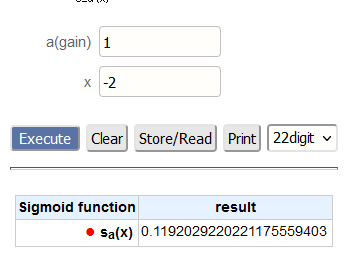           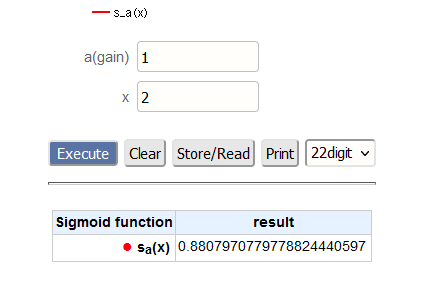

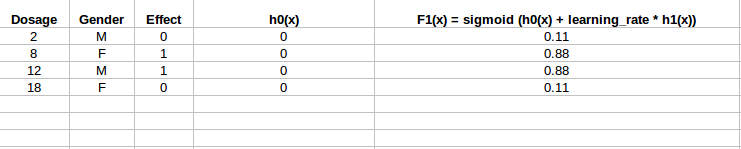

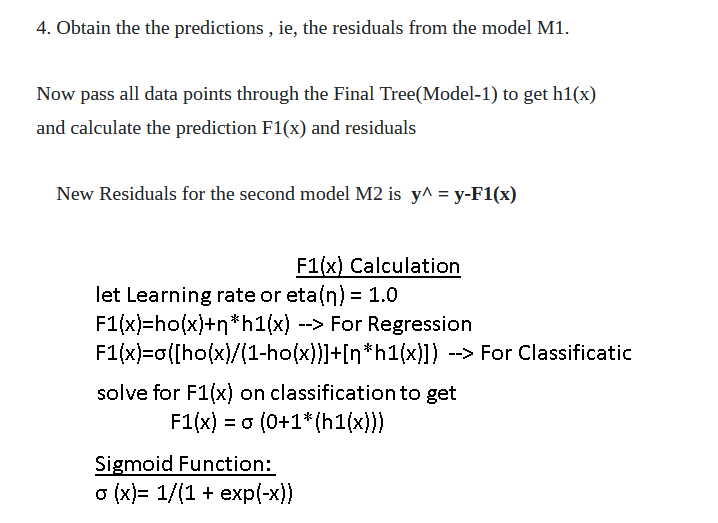

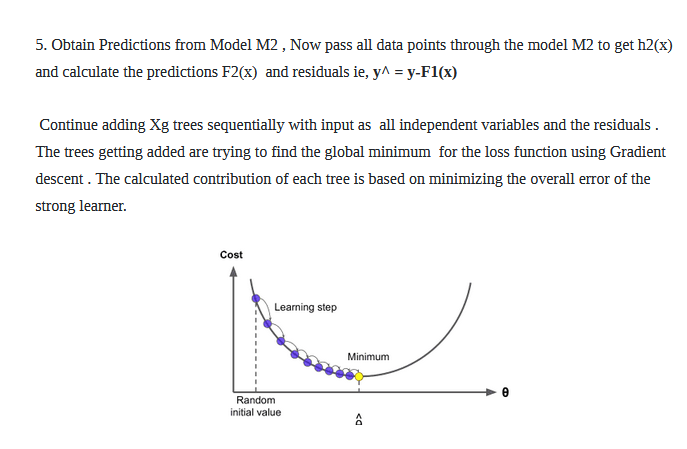


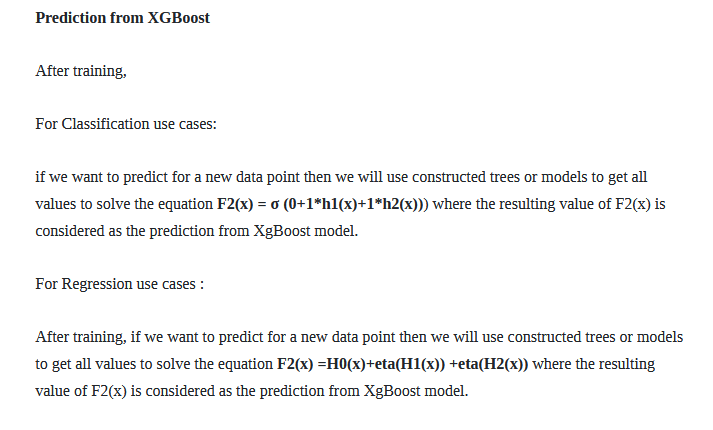

## Step 4. Repeat step 2 and Step 3 until required number of models are build.

Here we have <font color ='blue'>n_estimators = 2</font>. So we stop here with 2 trees.

# Regression : https://reinec.medium.com/my-notes-xgboost-regression-d1992695f8fc

# Python Implementation of Xgboost classifier

Now we will implement xgboost with same parameters with python and will plot the tree.

In [ ]:
# label encode Gender
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])

# dataset
X = df.drop(columns=['Effect']).values
y = df['Effect'].values

# Define parameters and fit XgBoost Model
model=XGBClassifier(max_depth=2,learning_rate=1,n_estimators=2,gamma=2,
                    min_child_weight=0,reg_alpha=0,reg_lambda=0,base_score=0.5)
model.fit(X, y)


# plot the first tree
plot_tree(model, num_trees=0)
plt.show()



Here f0 is nothing but 'dosage'.

# Hurrah !!!!! We got the same tree.  I think now you got a clear picture of how xgboost works.